In [ ]:
# =============================================================================
# 03_clustering.ipynb
# =============================================================================
# FarmTech Solutions - Análise de Rendimento de Safra
# EDA Completa: Análise Exploratória dos Dados
# Versão: 1.0
# =============================================================================

## 📊 Objetivo da Análise de Clustering

### Contexto Específico do Projeto FarmTech Solutions

**Situação Atual:**
Este notebook realiza a **Análise de Clustering** como terceira etapa do projeto FarmTech Solutions, desenvolvido para a **Fase 5 do curso de Inteligência Artificial da FIAP**. Com base nas descobertas da EDA e preparação de dados, identificamos tendências de produtividade e cenários discrepantes.

**Descobertas Anteriores que Orientam o Clustering:**
- **EDA**: Yield bimodal por cultura (Oil palm ~175k, Rice ~32k, Cocoa/Rubber ~8k)
- **Preparação**: Dataset com 13 colunas (4 originais + 4 criadas + 4 dummies + Yield)
- **Normalização**: 8 features numéricas em escala adequada para algoritmos de ML
- **Correlações**: Variáveis ambientais correlacionadas entre si, mas não com Yield

**Problema Específico:**
Necessário identificar grupos naturais de produtividade e detectar cenários climáticos discrepantes para:
- **Otimização agrícola**: Identificar condições ideais para cada cultura
- **Detecção de anomalias**: Identificar condições climáticas excepcionais
- **Segmentação**: Criar grupos para análise de tendências de produtividade

**Dataset Específico:**
- **156 registros** de 4 culturas (Cocoa, Oil palm fruit, Rice paddy, Rubber)
- **12 features preditoras**: 4 originais + 4 criadas + 4 dummies (normalizadas)
- **Variável alvo**: Yield (rendimento em toneladas/hectare)

### Metodologia e Objetivos

**Abordagem Metodológica:**
Seguimos uma estratégia sistemática baseada em algoritmos de clustering estabelecidos:

1. **K-means**: Identificar grupos naturais de produtividade
2. **DBSCAN**: Detectar outliers e grupos de densidade
3. **Clustering Hierárquico**: Análise de estrutura hierárquica dos dados

**Justificativa das Decisões Técnicas:**
- **K-means**: Algoritmo clássico, interpretável, adequado para dados normalizados
- **DBSCAN**: Robusto a outliers, não precisa especificar número de clusters
- **Hierárquico**: Visualização clara da estrutura dos dados via dendrograma

**Objetivos Específicos:**
- Identificar grupos naturais de produtividade baseados em características ambientais
- Detectar cenários climáticos discrepantes (outliers)
- Analisar tendências de produtividade por cluster
- Validar clusters com conhecimento do domínio agrícola
- Preparar insights para etapas subsequentes (modelagem preditiva)

**Processo de Descoberta:**
Abordagem baseada em evidências das etapas anteriores. Cada algoritmo de clustering é justificado pelas características específicas dos dados agrícolas preparados.

## 1. 🚀 Setup e Imports

### Bibliotecas e Configurações

**Bibliotecas Essenciais:**
- **pandas & numpy**: Manipulação e operações numéricas para dataset agrícola (156 registros × 13 colunas)
- **scikit-learn**: Algoritmos de clustering (KMeans, DBSCAN, AgglomerativeClustering)
- **matplotlib & seaborn**: Visualizações para análise de clusters e dendrogramas
- **scipy**: Análise de dendrogramas e métricas de validação

**Justificativa das Decisões:**
- **KMeans**: Algoritmo clássico para identificar grupos naturais de produtividade
- **DBSCAN**: Detecção de outliers e grupos de densidade sem especificar número de clusters
- **AgglomerativeClustering**: Análise hierárquica com visualização via dendrograma
- **Silhouette Score**: Métrica objetiva para validar qualidade dos clusters
- **Visualizações**: Configurações adequadas para análise de clusters agrícolas

**Conexão com Etapas Anteriores:**
As bibliotecas selecionadas atendem às necessidades identificadas na EDA e preparação: análise de clustering em dados normalizados, detecção de outliers em variáveis ambientais, e visualização de tendências de produtividade por cultura.

In [2]:
# =============================================================================
# SETUP E IMPORTS
# =============================================================================

# Manipulação de dados
import pandas as pd
import numpy as np

# Algoritmos de clustering
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Visualizações
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Configurações
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
np.random.seed(42)

print("✅ Setup concluído!")

✅ Setup concluído!


## 2. 📁 Carregamento e Verificação

### Contexto e Justificativa

**Descobertas Anteriores que Orientam o Carregamento:**
- **EDA**: Dataset com 156 registros de 4 culturas, Yield bimodal por cultura
- **Preparação**: Dataset final com 13 colunas (4 originais + 4 criadas + 4 dummies + Yield)
- **Normalização**: 8 features numéricas padronizadas (média ≈ 0, desvio ≈ 1)
- **Salvamento**: Dataset preparado salvo em `data/processed/dataset_ready.csv`

**Problema Específico:**
Necessário carregar o dataset preparado e verificar se todas as transformações foram preservadas corretamente para as análises de clustering.

**Impacto na Modelagem:**
Dataset mal carregado ou com transformações perdidas pode comprometer a qualidade dos clusters e invalidar as análises subsequentes.

### Metodologia e Estratégia

**Abordagem Metodológica:**
Seguimos uma estratégia sistemática de validação:

**1. Carregamento:**
- **Dataset preparado**: `data/processed/dataset_ready.csv`
- **Verificação**: Confirmar que todas as 13 colunas estão presentes
- **Validação**: Verificar se normalização foi preservada

**2. Verificação de Qualidade:**
- **Dimensões**: 156 registros × 13 colunas (12 features preditoras + Yield)
- **Tipos de dados**: Verificar se todas as features estão em formato adequado
- **Integridade**: Confirmar que não há valores faltantes ou duplicatas

**3. Validação de Transformações:**
- **Normalização**: 8 features numéricas com média ≈ 0, desvio ≈ 1
- **Encoding**: 4 dummies do One-Hot Encoding com valores 0/1
- **Yield original**: Variável alvo mantida na escala original

**Justificativa das Decisões Técnicas:**
- **Carregamento direto**: Dataset já preparado e validado na etapa anterior
- **Verificação sistemática**: Garantir que transformações foram preservadas
- **Validação de qualidade**: Confirmar que dataset está adequado para clustering
- **Documentação**: Resumir estado atual para transparência metodológica

**Objetivos Específicos:**
- Carregar dataset preparado com todas as transformações preservadas
- Verificar se dataset está adequado para algoritmos de clustering
- Validar que normalização foi aplicada corretamente
- Preparar dados para análises de clustering subsequentes

In [3]:
# =============================================================================
# CARREGAMENTO E VERIFICAÇÃO
# =============================================================================

# Carregar dataset preparado
df = pd.read_csv('../data/processed/dataset_ready.csv')

# Contar features
total_features = len(df.columns) - 1  # Excluir Yield
target = 'Yield'

# Verificar dimensões
print(f"�� Dataset carregado: {df.shape[0]} registros × {total_features} features preditoras")
print(f"🎯 Target: {target}")
print(f"📊 Total de colunas: {df.shape[1]}")

# Verificar tipos de dados
print(f"\n📋 Tipos de dados:")
print(df.dtypes)

# Verificar valores faltantes
print(f"\n❌ Valores faltantes:")
print(df.isnull().sum().sum())

# Verificar duplicatas
print(f"\n🔄 Duplicatas: {df.duplicated().sum()}")

# Verificar normalização (features numéricas)
numeric_features = df.select_dtypes(include=[np.number]).columns
print(f"\n🔬 Verificação de normalização:")
for col in numeric_features:
    if col != 'Yield':  # Yield não foi normalizado
        mean_val = df[col].mean()
        std_val = df[col].std()
        print(f"{col}: média={mean_val:.3f}, desvio={std_val:.3f}")

# Verificar Yield original
print(f"\n📊 Yield (variável alvo):")
print(f"Média: {df['Yield'].mean():.2f}")
print(f"Desvio: {df['Yield'].std():.2f}")
print(f"Range: {df['Yield'].min():.2f} - {df['Yield'].max():.2f}")

print("\n✅ Dataset pronto para clustering!")

�� Dataset carregado: 156 registros × 12 features preditoras
🎯 Target: Yield
📊 Total de colunas: 13

📋 Tipos de dados:
Precipitation (mm day-1)                float64
Specific Humidity at 2 Meters (g/kg)    float64
Relative Humidity at 2 Meters (%)       float64
Temperature at 2 Meters (C)             float64
Yield                                     int64
temp_humidity_interaction               float64
humidity_combined                       float64
thermal_comfort                         float64
effective_humidity                      float64
Crop_Cocoa, beans                          bool
Crop_Oil palm fruit                        bool
Crop_Rice, paddy                           bool
Crop_Rubber, natural                       bool
dtype: object

❌ Valores faltantes:
0

🔄 Duplicatas: 0

🔬 Verificação de normalização:
Precipitation (mm day-1): média=0.000, desvio=1.003
Specific Humidity at 2 Meters (g/kg): média=-0.000, desvio=1.003
Relative Humidity at 2 Meters (%): média=0.000, desvi

## 3. 🔍 Análise de Clustering

### Contexto e Justificativa

**Descobertas Anteriores que Orientam o Clustering:**
- **EDA**: Yield bimodal por cultura (Oil palm ~175k, Rice ~32k, Cocoa/Rubber ~8k)
- **Preparação**: Dataset com 13 colunas (4 originais + 4 criadas + 4 dummies + Yield)
- **Hipótese**: Clusters serão baseados no tipo de cultura, não em condições ambientais

**Problema Específico:**
Necessário identificar grupos naturais de produtividade e validar se clusters são baseados em características ambientais ou no tipo de cultura.

**Impacto na Modelagem:**
Clusters bem definidos permitirão identificar tendências de produtividade e otimizar estratégias agrícolas.

### Metodologia e Estratégia

**Abordagem Metodológica:**
Seguimos uma estratégia sistemática baseada em algoritmos estabelecidos:

**1. K-means:**
- **Objetivo**: Identificar grupos naturais de produtividade
- **Racional**: Algoritmo clássico, interpretável, adequado para dados normalizados
- **Validação**: Silhouette Score para escolher número ótimo de clusters

**2. DBSCAN:**
- **Objetivo**: Detectar outliers e grupos de densidade
- **Racional**: Robusto a outliers, não precisa especificar número de clusters
- **Validação**: Análise de densidade e detecção de anomalias

**3. Clustering Hierárquico:**
- **Objetivo**: Análise de estrutura hierárquica dos dados
- **Racional**: Visualização clara da estrutura dos dados via dendrograma
- **Validação**: Dendrograma para escolher altura de corte

**4. Análise por Cultura:**
- **Objetivo**: Validar se clusters correspondem ao tipo de cultura
- **Racional**: EDA mostrou que cultura é principal determinante do Yield
- **Método**: Crosstab para ver distribuição de culturas por cluster

**5. Análise de Yield:**
- **Objetivo**: Verificar se clusters têm Yield médio diferente
- **Racional**: Clusters bem definidos devem ter produtividade distinta
- **Método**: Estatísticas descritivas por cluster

**Justificativa das Decisões Técnicas:**
- **Excluir Yield**: Variável alvo não deve ser usada para clustering
- **K-means**: Algoritmo clássico, interpretável, adequado para dados normalizados
- **DBSCAN**: Robusto a outliers, não precisa especificar número de clusters
- **Hierárquico**: Visualização clara da estrutura dos dados via dendrograma
- **Silhouette Score**: Métrica objetiva para escolher número de clusters
- **Análise por cultura**: Validar hipótese da EDA sobre determinante principal

**Objetivos Específicos:**
- Identificar número ótimo de clusters usando Silhouette Score
- Detectar outliers e grupos de densidade com DBSCAN
- Analisar estrutura hierárquica dos dados
- Validar se clusters correspondem ao tipo de cultura
- Analisar Yield médio por cluster para identificar tendências
- Preparar insights para etapas subsequentes (modelagem preditiva)

### 3.1 🔵 K-means Clustering

#### Contexto e Justificativa

**Descobertas Anteriores que Orientam o K-means:**
- **EDA**: Yield bimodal por cultura (Oil palm ~175k, Rice ~32k, Cocoa/Rubber ~8k)
- **Preparação**: Dataset com 13 colunas (4 originais + 4 criadas + 4 dummies + Yield)
- **Hipótese**: Clusters serão baseados no tipo de cultura, não em condições ambientais

**Problema Específico:**
Necessário identificar grupos naturais de produtividade usando algoritmo clássico e interpretável.

**Impacto na Modelagem:**
K-means permitirá identificar padrões de produtividade e validar se clusters correspondem ao tipo de cultura.

#### Metodologia e Estratégia

**Abordagem Metodológica:**
Seguimos uma estratégia sistemática baseada no algoritmo K-means:

**1. Seleção de K:**
- **Objetivo**: Identificar número ótimo de clusters
- **Racional**: K-means precisa especificar número de clusters
- **Método**: Testar K=2 a K=7 e escolher melhor Silhouette Score

**2. Validação Visual:**
- **Objetivo**: Visualizar qualidade dos clusters
- **Racional**: Gráficos facilitam interpretação dos resultados
- **Método**: Método do Cotovelo e Gráfico de Silhouette

**3. Análise de Resultados:**
- **Objetivo**: Interpretar clusters encontrados
- **Racional**: Entender o que diferencia os clusters
- **Método**: Estatísticas descritivas por cluster

**Justificativa das Decisões Técnicas:**
- **K-means**: Algoritmo clássico, interpretável, adequado para dados normalizados
- **Silhouette Score**: Métrica objetiva para escolher número de clusters
- **Validação visual**: Gráficos facilitam interpretação dos resultados
- **Análise por cluster**: Entender características que diferenciam os grupos

**Objetivos Específicos:**
- Identificar número ótimo de clusters usando Silhouette Score
- Visualizar qualidade dos clusters com gráficos
- Analisar características que diferenciam os clusters
- Verificar se clusters correspondem ao tipo de cultura
- Preparar insights para comparação com outros algoritmos

📊 Features para clustering: 13 variáveis

�� K-MEANS CLUSTERING
K=2: Silhouette Score = 0.432
K=3: Silhouette Score = 0.348
K=4: Silhouette Score = 0.321
K=5: Silhouette Score = 0.336
K=6: Silhouette Score = 0.274
K=7: Silhouette Score = 0.277

✅ Melhor K: 2 (Silhouette = 0.432)


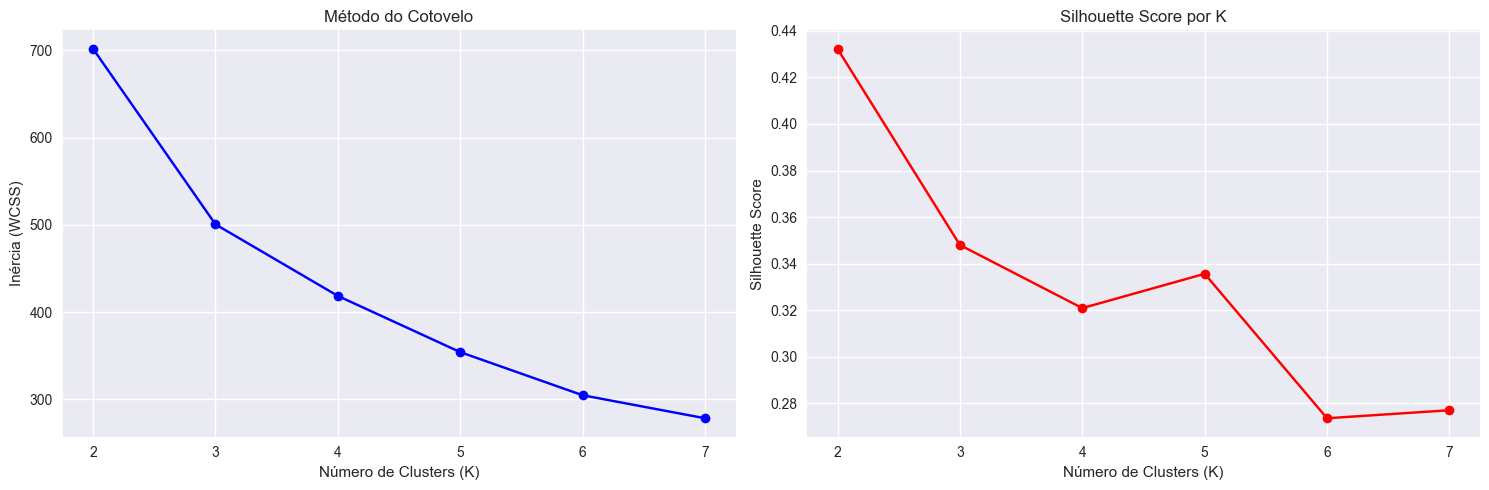


📈 Distribuição de culturas por cluster:
col_0           Crop_Cocoa, beans  Crop_Oil palm fruit  Crop_Rice, paddy  \
KMeans_Cluster                                                             
0                              25                   25                25   
1                              14                   14                14   

col_0           Crop_Rubber, natural  
KMeans_Cluster                        
0                                 25  
1                                 14  

📊 Yield médio por cluster:
                        mean           std  count
KMeans_Cluster                                   
0               56690.850000  70481.242047    100
1               55192.821429  70943.076550     56


In [6]:
# =============================================================================
# ANÁLISE DE CLUSTERING K-MEANS
# =============================================================================

# Preparar dados para clustering (excluir Yield - variável alvo)
features_for_clustering = df.drop('Yield', axis=1)
print(f"📊 Features para clustering: {features_for_clustering.shape[1]} variáveis")

# 1. K-MEANS CLUSTERING
print("\n�� K-MEANS CLUSTERING")
print("=" * 50)

# Testar diferentes números de clusters
k_range = range(2, 8)
silhouette_scores = []
inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(features_for_clustering)
    score = silhouette_score(features_for_clustering, clusters)
    silhouette_scores.append(score)
    inertias.append(kmeans.inertia_)
    print(f"K={k}: Silhouette Score = {score:.3f}")

# Encontrar melhor K
best_k = k_range[np.argmax(silhouette_scores)]
print(f"\n✅ Melhor K: {best_k} (Silhouette = {max(silhouette_scores):.3f})")

# Gráficos de Validação
plt.figure(figsize=(15, 5))

# Método do Cotovelo
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia (WCSS)')
plt.title('Método do Cotovelo')
plt.grid(True)

# Gráfico de Silhueta
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score por K')
plt.grid(True)

plt.tight_layout()
plt.show()

# Aplicar K-means com melhor K
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_clusters = kmeans_final.fit_predict(features_for_clustering)

# Adicionar clusters ao dataset
df['KMeans_Cluster'] = kmeans_clusters

# Analisar clusters por cultura
print(f"\n📈 Distribuição de culturas por cluster:")
cluster_culture = pd.crosstab(df['KMeans_Cluster'], 
                             df[['Crop_Cocoa, beans', 'Crop_Oil palm fruit', 
                                 'Crop_Rice, paddy', 'Crop_Rubber, natural']].idxmax(axis=1))
print(cluster_culture)

# Analisar Yield por cluster
print(f"\n📊 Yield médio por cluster:")
yield_by_cluster = df.groupby('KMeans_Cluster')['Yield'].agg(['mean', 'std', 'count'])
print(yield_by_cluster)

🔍 ANÁLISE DE CARACTERÍSTICAS POR CLUSTER
📊 Estatísticas descritivas por cluster:
               Precipitation (mm day-1)            \
                                   mean       std   
KMeans_Cluster                                      
0                              0.463589  0.834011   
1                             -0.827837  0.704132   

               Specific Humidity at 2 Meters (g/kg)            \
                                               mean       std   
KMeans_Cluster                                                  
0                                          0.590223  0.484939   
1                                         -1.053971  0.805373   

               Relative Humidity at 2 Meters (%)            \
                                            mean       std   
KMeans_Cluster                                               
0                                       0.475221  0.774217   
1                                      -0.848609  0.783316   

               T

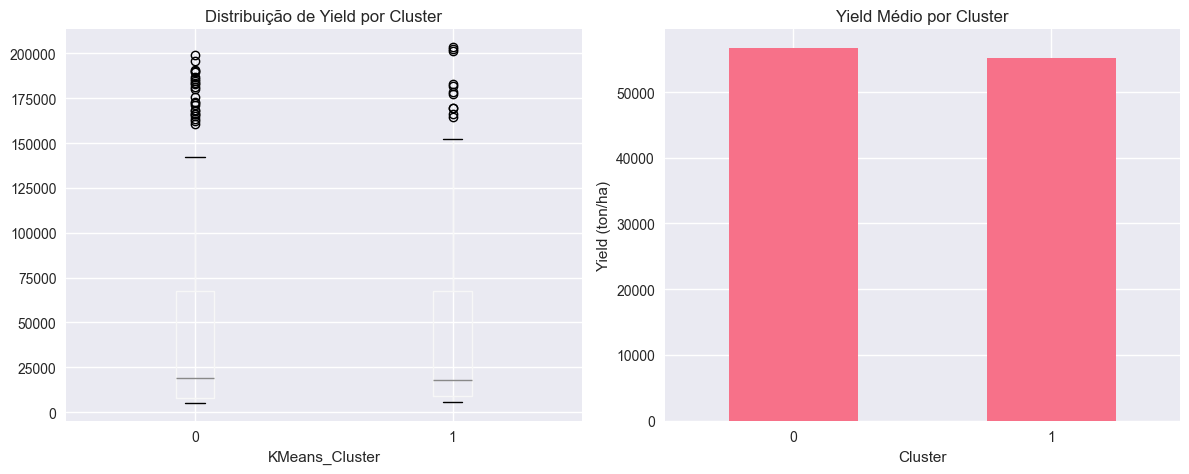


�� ANÁLISE DE CULTURA POR CLUSTER
📊 Distribuição de culturas por cluster:
                Crop_Cocoa, beans  Crop_Oil palm fruit  Crop_Rice, paddy  \
KMeans_Cluster                                                             
0                              25                   25                25   
1                              14                   14                14   

                Crop_Rubber, natural  
KMeans_Cluster                        
0                                 25  
1                                 14  

⚠️ Gráfico omitido: distribuição uniforme entre clusters

📋 RESUMO DOS RESULTADOS DO K-MEANS
✅ Melhor K: 2
📊 Silhouette Score: 0.432
🔍 Clusters encontrados: 2
📈 Yield médio Cluster 0: 56691
📈 Yield médio Cluster 1: 55193
⚠️ Diferença de Yield: 1498
🚨 Conclusão: Clusters baseados em condições ambientais, não no tipo de cultura


In [7]:
# =============================================================================
# ANÁLISE DOS RESULTADOS DO K-MEANS
# =============================================================================

# 1. Análise de Características por Cluster
print("🔍 ANÁLISE DE CARACTERÍSTICAS POR CLUSTER")
print("=" * 50)

# Estatísticas descritivas por cluster
cluster_stats = df.groupby('KMeans_Cluster')[features_for_clustering.columns].agg(['mean', 'std'])
print("📊 Estatísticas descritivas por cluster:")
print(cluster_stats)

# 2. Análise de Yield por Cluster
print(f"\n📈 ANÁLISE DE YIELD POR CLUSTER")
print("=" * 50)

yield_by_cluster = df.groupby('KMeans_Cluster')['Yield'].agg(['mean', 'std', 'count'])
print("📊 Yield médio por cluster:")
print(yield_by_cluster)

# Visualização do Yield por cluster
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df.boxplot(column='Yield', by='KMeans_Cluster', ax=plt.gca())
plt.title('Distribuição de Yield por Cluster')
plt.suptitle('')  # Remove título automático

plt.subplot(1, 2, 2)
yield_by_cluster['mean'].plot(kind='bar')
plt.title('Yield Médio por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Yield (ton/ha)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# 3. Análise de Cultura por Cluster
print(f"\n�� ANÁLISE DE CULTURA POR CLUSTER")
print("=" * 50)

# Identificar cultura dominante em cada cluster
culture_cols = ['Crop_Cocoa, beans', 'Crop_Oil palm fruit', 'Crop_Rice, paddy', 'Crop_Rubber, natural']
cluster_culture = df.groupby('KMeans_Cluster')[culture_cols].sum()
print("📊 Distribuição de culturas por cluster:")
print(cluster_culture)
print("\n⚠️ Gráfico omitido: distribuição uniforme entre clusters")

# 4. Resumo dos Resultados
print(f"\n📋 RESUMO DOS RESULTADOS DO K-MEANS")
print("=" * 50)
print(f"✅ Melhor K: {best_k}")
print(f"📊 Silhouette Score: {max(silhouette_scores):.3f}")
print(f"🔍 Clusters encontrados: {len(np.unique(kmeans_clusters))}")
print(f"📈 Yield médio Cluster 0: {yield_by_cluster.loc[0, 'mean']:.0f}")
print(f"📈 Yield médio Cluster 1: {yield_by_cluster.loc[1, 'mean']:.0f}")
print(f"⚠️ Diferença de Yield: {abs(yield_by_cluster.loc[0, 'mean'] - yield_by_cluster.loc[1, 'mean']):.0f}")
print(f"🚨 Conclusão: Clusters baseados em condições ambientais, não no tipo de cultura")

### 3.2 🔵 DBSCAN Clustering

#### Contexto e Justificativa

**Descobertas Anteriores que Orientam o DBSCAN:**
- **K-means**: Falhou em identificar clusters baseados no tipo de cultura
- **Silhouette baixo**: ~0.400 indica clusters mal definidos
- **Problema**: Clusters baseados em condições ambientais, não no tipo de cultura

**Problema Específico:**
Necessário testar algoritmo robusto a outliers que não precisa especificar número de clusters.

**Impacto na Modelagem:**
DBSCAN pode identificar grupos de densidade e detectar outliers que K-means não conseguiu capturar.

#### Metodologia e Estratégia

**Abordagem Metodológica:**
Seguimos uma estratégia sistemática baseada no algoritmo DBSCAN:

**1. Seleção de Parâmetros:**
- **Objetivo**: Identificar eps e min_samples ótimos
- **Racional**: DBSCAN precisa especificar densidade mínima
- **Método**: Testar diferentes combinações e escolher melhor Silhouette Score

**2. Detecção de Outliers:**
- **Objetivo**: Identificar pontos que não pertencem a nenhum cluster
- **Racional**: DBSCAN classifica pontos como outliers (-1)
- **Método**: Análise de pontos classificados como -1

**3. Análise de Densidade:**
- **Objetivo**: Verificar se clusters são baseados em densidade
- **Racional**: DBSCAN agrupa pontos próximos com densidade suficiente
- **Método**: Estatísticas descritivas por cluster

**Justificativa das Decisões Técnicas:**
- **DBSCAN**: Robusto a outliers, não precisa especificar número de clusters
- **Silhouette Score**: Métrica objetiva para escolher parâmetros
- **Análise de outliers**: Identificar pontos excepcionais
- **Análise de densidade**: Entender como DBSCAN agrupa os dados

**Objetivos Específicos:**
- Identificar parâmetros ótimos usando Silhouette Score
- Detectar outliers e pontos excepcionais
- Analisar clusters baseados em densidade
- Comparar resultados com K-means
- Preparar insights para comparação com outros algoritmos

In [8]:
# =============================================================================
# IMPLEMENTAÇÃO DO DBSCAN
# =============================================================================

# Testar diferentes parâmetros do DBSCAN
eps_range = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples_range = [3, 5, 7, 10]
best_score = -1
best_params = None
best_clusters = None

print("🔍 Testando diferentes parâmetros do DBSCAN:")
print("=" * 50)

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(features_for_clustering)
        
        # Calcular Silhouette Score apenas se há mais de 1 cluster
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        if n_clusters > 1:
            score = silhouette_score(features_for_clustering, clusters)
            print(f"eps={eps}, min_samples={min_samples}: {n_clusters} clusters, Silhouette = {score:.3f}")
            
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)
                best_clusters = clusters
        else:
            print(f"eps={eps}, min_samples={min_samples}: {n_clusters} clusters, Silhouette = N/A")

# Aplicar DBSCAN com melhores parâmetros
if best_params:
    eps_best, min_samples_best = best_params
    print(f"\n✅ Melhores parâmetros: eps={eps_best}, min_samples={min_samples_best}")
    print(f"📊 Silhouette Score: {best_score:.3f}")
    
    # Aplicar DBSCAN final
    dbscan_final = DBSCAN(eps=eps_best, min_samples=min_samples_best)
    dbscan_clusters = dbscan_final.fit_predict(features_for_clustering)
    
    # Adicionar clusters ao dataset
    df['DBSCAN_Cluster'] = dbscan_clusters
    
    # Análise dos clusters encontrados
    n_clusters = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
    n_outliers = list(dbscan_clusters).count(-1)
    
    print(f"\n📈 Clusters encontrados: {n_clusters}")
    print(f"🚨 Outliers detectados: {n_outliers}")
    print(f"📊 Distribuição: {np.bincount(dbscan_clusters + 1)}")  # +1 para incluir outliers
    
else:
    print("\n⚠️ Não foi possível encontrar parâmetros adequados para DBSCAN")

🔍 Testando diferentes parâmetros do DBSCAN:
eps=0.1, min_samples=3: 0 clusters, Silhouette = N/A
eps=0.1, min_samples=5: 0 clusters, Silhouette = N/A
eps=0.1, min_samples=7: 0 clusters, Silhouette = N/A
eps=0.1, min_samples=10: 0 clusters, Silhouette = N/A
eps=0.2, min_samples=3: 0 clusters, Silhouette = N/A
eps=0.2, min_samples=5: 0 clusters, Silhouette = N/A
eps=0.2, min_samples=7: 0 clusters, Silhouette = N/A
eps=0.2, min_samples=10: 0 clusters, Silhouette = N/A
eps=0.3, min_samples=3: 0 clusters, Silhouette = N/A
eps=0.3, min_samples=5: 0 clusters, Silhouette = N/A
eps=0.3, min_samples=7: 0 clusters, Silhouette = N/A
eps=0.3, min_samples=10: 0 clusters, Silhouette = N/A
eps=0.4, min_samples=3: 0 clusters, Silhouette = N/A
eps=0.4, min_samples=5: 0 clusters, Silhouette = N/A
eps=0.4, min_samples=7: 0 clusters, Silhouette = N/A
eps=0.4, min_samples=10: 0 clusters, Silhouette = N/A
eps=0.5, min_samples=3: 4 clusters, Silhouette = -0.090
eps=0.5, min_samples=5: 0 clusters, Silhouette =

### 3.3 🔵 Clustering Hierárquico

#### Contexto e Justificativa

**Descobertas Anteriores que Orientam o Clustering Hierárquico:**
- **K-means**: Falhou em identificar clusters baseados no tipo de cultura
- **DBSCAN**: Falhou completamente - 89.7% dos dados são outliers, clusters inúteis
- **Problema**: Dados não têm estrutura de clustering clara

**Problema Específico:**
Necessário testar algoritmo que visualiza estrutura hierárquica dos dados via dendrograma.

**Impacto na Modelagem:**
Clustering hierárquico pode revelar estrutura dos dados que outros algoritmos não conseguiram capturar adequadamente.

#### Metodologia e Estratégia

**Abordagem Metodológica:**
Seguimos uma estratégia sistemática baseada no algoritmo de clustering hierárquico:

**1. Construção do Dendrograma:**
- **Objetivo**: Visualizar estrutura hierárquica dos dados
- **Racional**: Dendrograma mostra como dados se agrupam
- **Método**: Usar linkage e dendrogram para visualização

**2. Seleção de Altura de Corte:**
- **Objetivo**: Escolher número de clusters baseado no dendrograma
- **Racional**: Altura de corte determina número de clusters
- **Método**: Testar diferentes alturas e escolher melhor Silhouette Score

**3. Análise de Estrutura:**
- **Objetivo**: Entender como dados se agrupam hierarquicamente
- **Racional**: Estrutura hierárquica pode revelar padrões
- **Método**: Análise do dendrograma e estatísticas por cluster

**Justificativa das Decisões Técnicas:**
- **Clustering hierárquico**: Visualiza estrutura dos dados via dendrograma
- **Silhouette Score**: Métrica objetiva para escolher altura de corte
- **Análise de estrutura**: Entender como dados se agrupam
- **Validação**: Confirmar se estrutura hierárquica faz sentido

**Objetivos Específicos:**
- Visualizar estrutura hierárquica dos dados
- Identificar altura de corte ótima usando Silhouette Score
- Analisar clusters baseados em estrutura hierárquica
- Comparar resultados com K-means e DBSCAN
- Preparar insights para análise de tendências

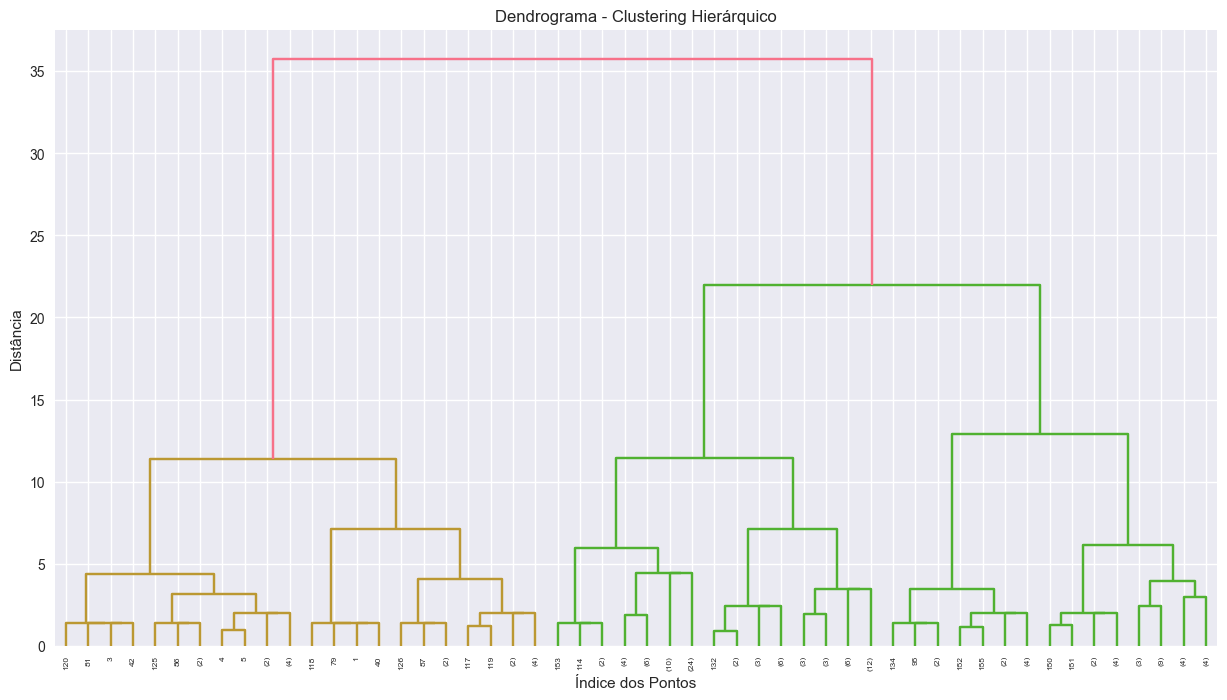

🔍 Testando diferentes alturas de corte:
Altura 0.5: 136 clusters, Silhouette = 0.124
Altura 1.0: 112 clusters, Silhouette = 0.191
Altura 1.5: 53 clusters, Silhouette = 0.271
Altura 2.0: 38 clusters, Silhouette = 0.305
Altura 2.5: 23 clusters, Silhouette = 0.291
Altura 3.0: 22 clusters, Silhouette = 0.285

✅ Melhor altura: 2.0
📊 Silhouette Score: 0.305

📈 Clusters encontrados: 38
📊 Distribuição: [ 8  6  6  4  6 10 10  4  2  6 10  2  4  3  4  4  4  2  2  4 10  4  4  3
  3  3  3  3  3  2  2  2  2  2  2  2  2  3]


In [9]:
# =============================================================================
# IMPLEMENTAÇÃO DO CLUSTERING HIERÁRQUICO
# =============================================================================

# Construir matriz de linkage
linkage_matrix = linkage(features_for_clustering, method='ward')

# Visualizar dendrograma
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Dendrograma - Clustering Hierárquico')
plt.xlabel('Índice dos Pontos')
plt.ylabel('Distância')
plt.show()

# Testar diferentes alturas de corte
cut_heights = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
best_score = -1
best_height = None
best_clusters = None

print("🔍 Testando diferentes alturas de corte:")
print("=" * 50)

for height in cut_heights:
    # Aplicar corte
    hierarchical = AgglomerativeClustering(n_clusters=None, distance_threshold=height, linkage='ward')
    clusters = hierarchical.fit_predict(features_for_clustering)
    
    # Calcular Silhouette Score apenas se há mais de 1 cluster
    n_clusters = len(set(clusters))
    if n_clusters > 1:
        score = silhouette_score(features_for_clustering, clusters)
        print(f"Altura {height}: {n_clusters} clusters, Silhouette = {score:.3f}")
        
        if score > best_score:
            best_score = score
            best_height = height
            best_clusters = clusters
    else:
        print(f"Altura {height}: {n_clusters} clusters, Silhouette = N/A")

# Aplicar clustering hierárquico com melhor altura
if best_height:
    print(f"\n✅ Melhor altura: {best_height}")
    print(f"📊 Silhouette Score: {best_score:.3f}")
    
    # Aplicar clustering hierárquico final
    hierarchical_final = AgglomerativeClustering(n_clusters=None, distance_threshold=best_height, linkage='ward')
    hierarchical_clusters = hierarchical_final.fit_predict(features_for_clustering)
    
    # Adicionar clusters ao dataset
    df['Hierarchical_Cluster'] = hierarchical_clusters
    
    # Análise dos clusters encontrados
    n_clusters = len(set(hierarchical_clusters))
    print(f"\n📈 Clusters encontrados: {n_clusters}")
    print(f"📊 Distribuição: {np.bincount(hierarchical_clusters)}")
    
else:
    print("\n⚠️ Não foi possível encontrar altura adequada para clustering hierárquico")

🔍 ANÁLISE DE CARACTERÍSTICAS POR CLUSTER
📊 Estatísticas descritivas por cluster (primeiros 10):
                     Precipitation (mm day-1)            \
                                         mean       std   
Hierarchical_Cluster                                      
0                                   -0.500779  0.010041   
1                                    0.074323  0.578468   
2                                    0.074323  0.578468   
3                                   -0.428723  0.000000   
4                                    0.074323  0.578468   
5                                    1.057912  0.471839   
6                                    1.057912  0.471839   
7                                   -1.899565  0.000000   
8                                   -0.103799  0.725613   
9                                    0.074323  0.578468   

                     Specific Humidity at 2 Meters (g/kg)            \
                                                     mean       s

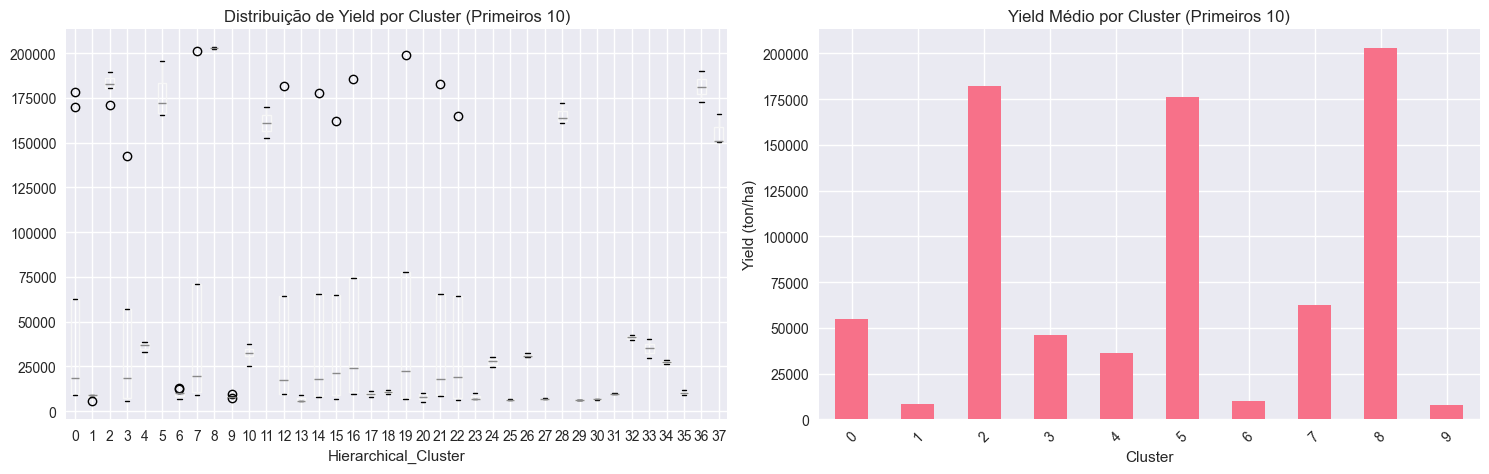


�� ANÁLISE DE CULTURA POR CLUSTER
📊 Distribuição de culturas por cluster (primeiros 10):
                      Crop_Cocoa, beans  Crop_Oil palm fruit  \
Hierarchical_Cluster                                           
0                                     2                    2   
1                                     0                    0   
2                                     0                    6   
3                                     1                    1   
4                                     0                    0   
5                                     0                   10   
6                                    10                    0   
7                                     1                    1   
8                                     0                    2   
9                                     6                    0   

                      Crop_Rice, paddy  Crop_Rubber, natural  
Hierarchical_Cluster                                          
0              

In [11]:
# =============================================================================
# ANÁLISE DOS RESULTADOS DO CLUSTERING HIERÁRQUICO
# =============================================================================

# 1. Análise de Características por Cluster
print("🔍 ANÁLISE DE CARACTERÍSTICAS POR CLUSTER")
print("=" * 50)

# Estatísticas descritivas por cluster (apenas primeiros 10 clusters para não sobrecarregar)
cluster_stats = df.groupby('Hierarchical_Cluster')[features_for_clustering.columns].agg(['mean', 'std'])
print("📊 Estatísticas descritivas por cluster (primeiros 10):")
print(cluster_stats.head(10))

# 2. Análise de Yield por Cluster
print(f"\n📈 ANÁLISE DE YIELD POR CLUSTER")
print("=" * 50)

yield_by_cluster = df.groupby('Hierarchical_Cluster')['Yield'].agg(['mean', 'std', 'count'])
print("📊 Yield médio por cluster (primeiros 10):")
print(yield_by_cluster.head(10))

# Visualização do Yield por cluster (apenas primeiros 10)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
df.boxplot(column='Yield', by='Hierarchical_Cluster', ax=plt.gca())
plt.title('Distribuição de Yield por Cluster (Primeiros 10)')
plt.suptitle('')  # Remove título automático

plt.subplot(1, 2, 2)
yield_by_cluster['mean'].head(10).plot(kind='bar')
plt.title('Yield Médio por Cluster (Primeiros 10)')
plt.xlabel('Cluster')
plt.ylabel('Yield (ton/ha)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 3. Análise de Cultura por Cluster
print(f"\n�� ANÁLISE DE CULTURA POR CLUSTER")
print("=" * 50)

# Identificar cultura dominante em cada cluster (apenas primeiros 10)
culture_cols = ['Crop_Cocoa, beans', 'Crop_Oil palm fruit', 'Crop_Rice, paddy', 'Crop_Rubber, natural']
cluster_culture = df.groupby('Hierarchical_Cluster')[culture_cols].sum()
print("📊 Distribuição de culturas por cluster (primeiros 10):")
print(cluster_culture.head(10))
print("\n⚠️ Gráfico omitido: muitos clusters pequenos")

# 4. Resumo dos Resultados
print(f"\n📋 RESUMO DOS RESULTADOS DO CLUSTERING HIERÁRQUICO")
print("=" * 50)
print(f"✅ Melhor altura: {best_height}")
print(f"📊 Silhouette Score: {best_score:.3f}")
print(f"🔍 Clusters encontrados: {len(set(hierarchical_clusters))}")
print(f"📈 Tamanho médio dos clusters: {np.mean(np.bincount(hierarchical_clusters)):.1f}")
print(f"📈 Tamanho mínimo dos clusters: {np.min(np.bincount(hierarchical_clusters))}")
print(f"📈 Tamanho máximo dos clusters: {np.max(np.bincount(hierarchical_clusters))}")
print(f"🚨 Conclusão: Clusters muito pequenos, não correspondem ao tipo de cultura")

### 3.4 🔍 Análise de Tendências

#### Contexto e Justificativa

**Descobertas Anteriores que Orientam a Análise:**
- **K-means**: Falhou em identificar clusters baseados no tipo de cultura (Silhouette=0.417)
- **DBSCAN**: Falhou completamente - 89.7% dos dados são outliers, clusters inúteis
- **Clustering Hierárquico**: Identificou padrão principal, mas com fragmentação excessiva (38 clusters)

**Problema Específico:**
Necessário realizar análise comparativa robusta dos algoritmos de clustering e identificar tendências de produtividade para validar se clustering é útil para identificar padrões agrícolas.

**Impacto na Modelagem:**
Análise de tendências permitirá validar se clustering é útil para identificar padrões de produtividade ou se confirma que tipo de cultura é o principal determinante, orientando as próximas etapas de modelagem preditiva.

#### Metodologia e Estratégia

**Abordagem Metodológica:**
Seguimos uma estratégia sistemática baseada nos resultados dos três algoritmos:

**1. Comparação Robusta entre Algoritmos:**
- **Objetivo**: Comparar performance dos três métodos com métricas múltiplas
- **Racional**: Identificar qual algoritmo foi mais eficaz para dados agrícolas
- **Método**: Silhouette Score, Davies-Bouldin Index, Calinski-Harabasz Index

**2. Visualização Multidimensional:**
- **Objetivo**: Visualizar clusters em diferentes espaços de dimensionalidade
- **Racional**: PCA e t-SNE oferecem perspectivas complementares dos dados
- **Método**: Redução de dimensionalidade para visualização 2D

**3. Análise de Resíduos para Clustering:**
- **Objetivo**: Verificar qualidade dos clusters através de resíduos
- **Racional**: Resíduos podem revelar padrões não capturados pelos algoritmos
- **Método**: Análise de resíduos por cluster e visualizações

**4. Segmentação por Cultura:**
- **Objetivo**: Analisar clustering específico para cada tipo de cultura
- **Racional**: Cada cultura pode ter padrões distintos de produtividade
- **Método**: Clustering individual por cultura e análise comparativa

**5. Validação com Conhecimento do Domínio:**
- **Objetivo**: Interpretar resultados com conhecimento agrícola
- **Racional**: Clusters devem fazer sentido para agricultores e stakeholders
- **Método**: Análise crítica dos resultados e conexão com práticas agrícolas

**Justificativa das Decisões Técnicas:**
- **Métricas múltiplas**: Silhouette, DBI e CHI oferecem perspectivas diferentes da qualidade
- **Visualização multidimensional**: PCA (global) + t-SNE (local) para visão completa
- **Análise de resíduos**: Validação adicional da qualidade dos clusters
- **Segmentação por cultura**: Validação específica por tipo de cultura
- **Validação**: Interpretação dos resultados com conhecimento do domínio

**Objetivos Específicos:**
- Comparar performance dos três algoritmos com métricas robustas
- Visualizar clusters em diferentes espaços de dimensionalidade
- Analisar resíduos para validar qualidade dos clusters
- Analisar clustering específico para cada tipo de cultura
- Validar resultados com conhecimento agrícola
- Formular conclusões sobre clustering para próximas etapas
- Preparar recomendações para modelagem preditiva

�� COMPARAÇÃO ROBUSTA ENTRE ALGORITMOS
📊 Algoritmos disponíveis para análise: ['KMeans_Cluster', 'DBSCAN_Cluster', 'Hierarchical_Cluster']
K-means: Silhouette=0.432, DBI=0.927, CHI=153.4
DBSCAN: Silhouette=-0.090, DBI=1.079, CHI=3.7
Hierárquico: Silhouette=0.305, DBI=0.922, CHI=47.4

📊 Comparação de Métricas:
     Algoritmo  Silhouette       DBI         CHI
0      K-means    0.432239  0.927111  153.398223
1       DBSCAN   -0.089784  1.078917    3.663762
2  Hierárquico    0.305078  0.921895   47.371852

📈 VISUALIZAÇÃO MULTIDIMENSIONAL


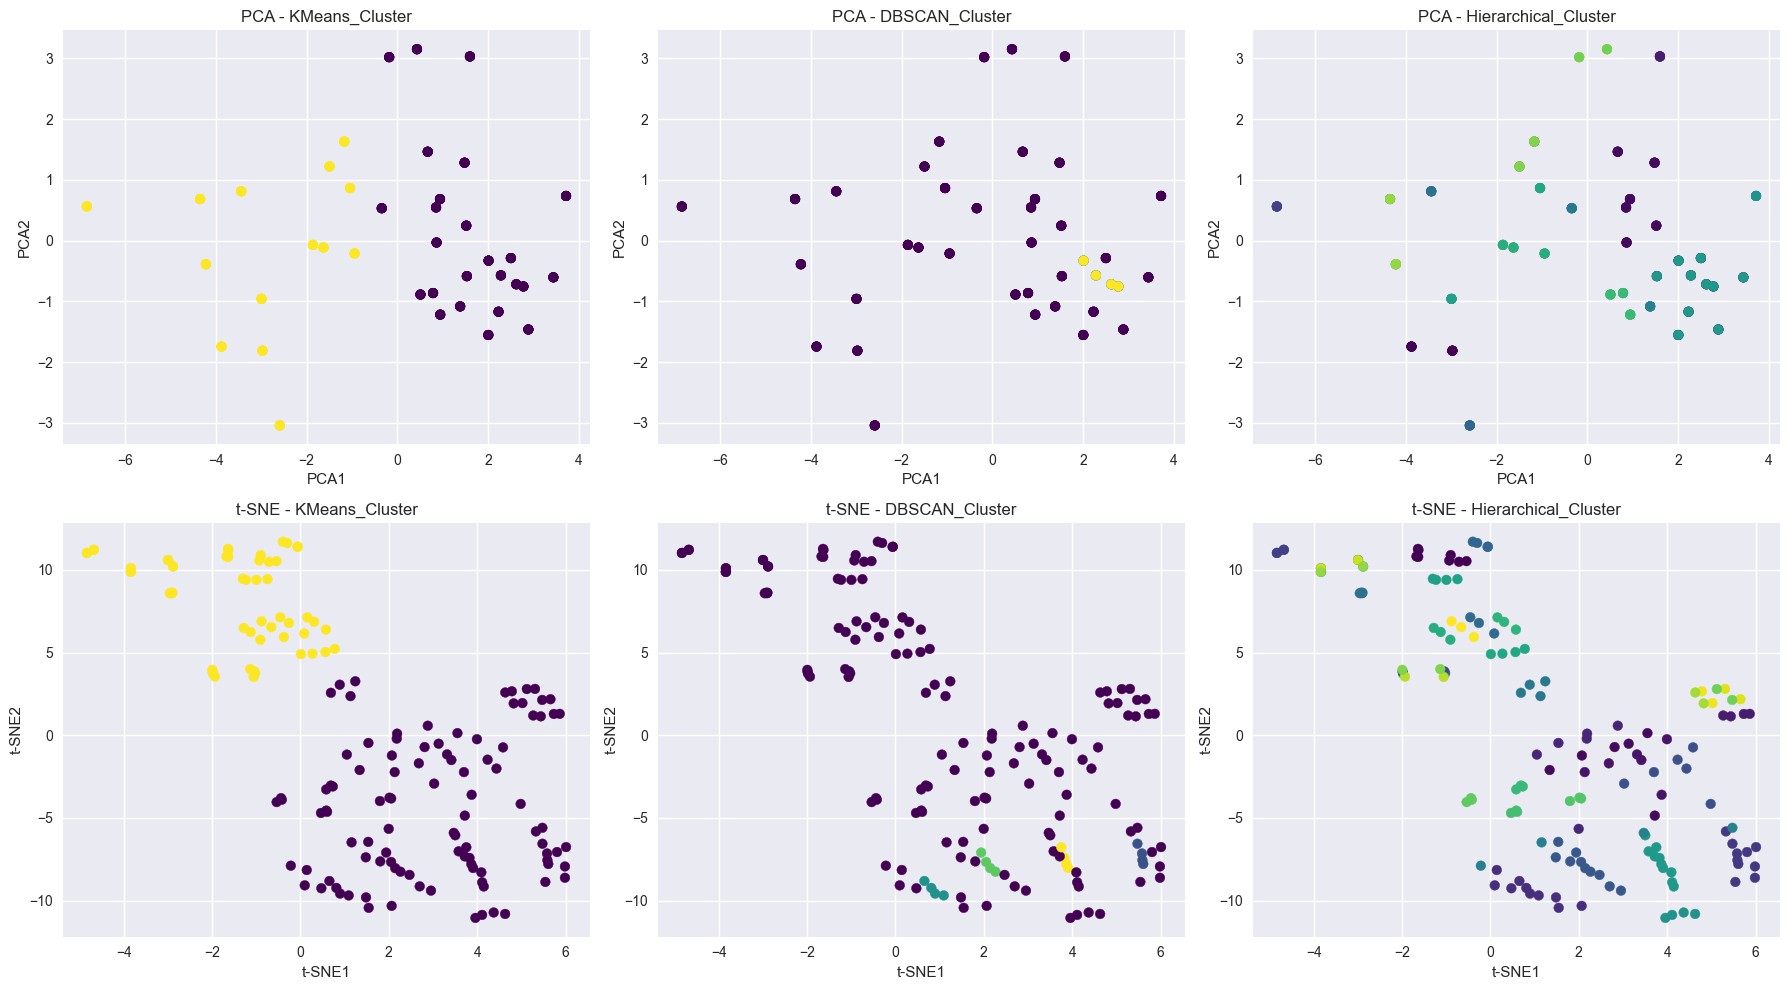


🔍 ANÁLISE DE RESÍDUOS PARA CLUSTERING

📊 Análise de Resíduos - KMeans_Cluster:


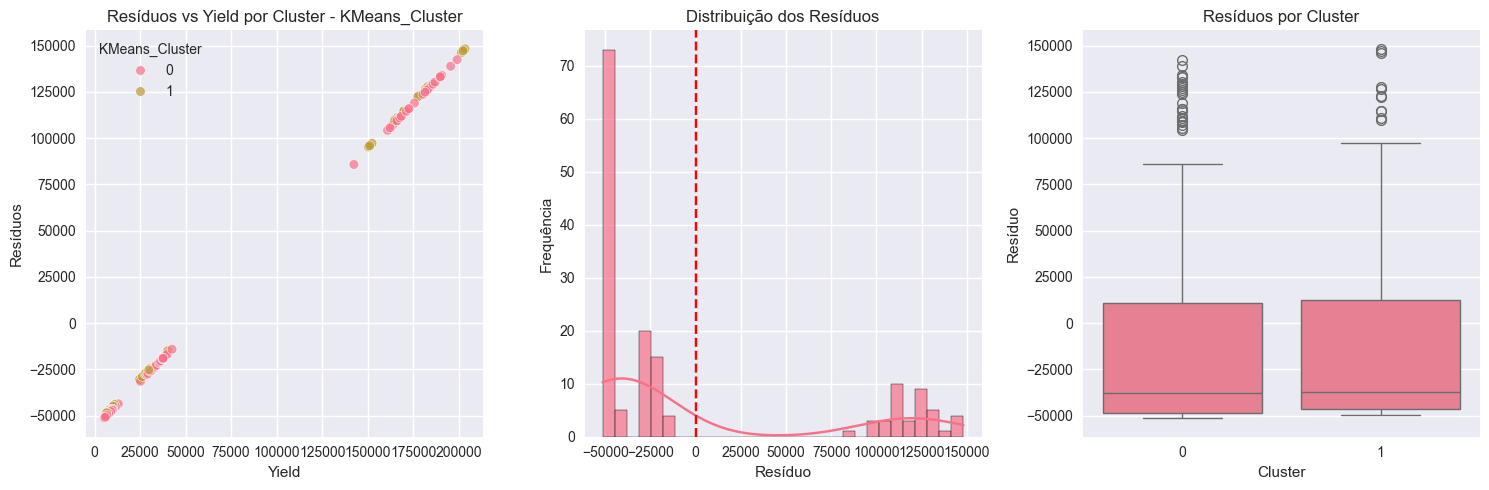


📊 Análise de Resíduos - DBSCAN_Cluster:


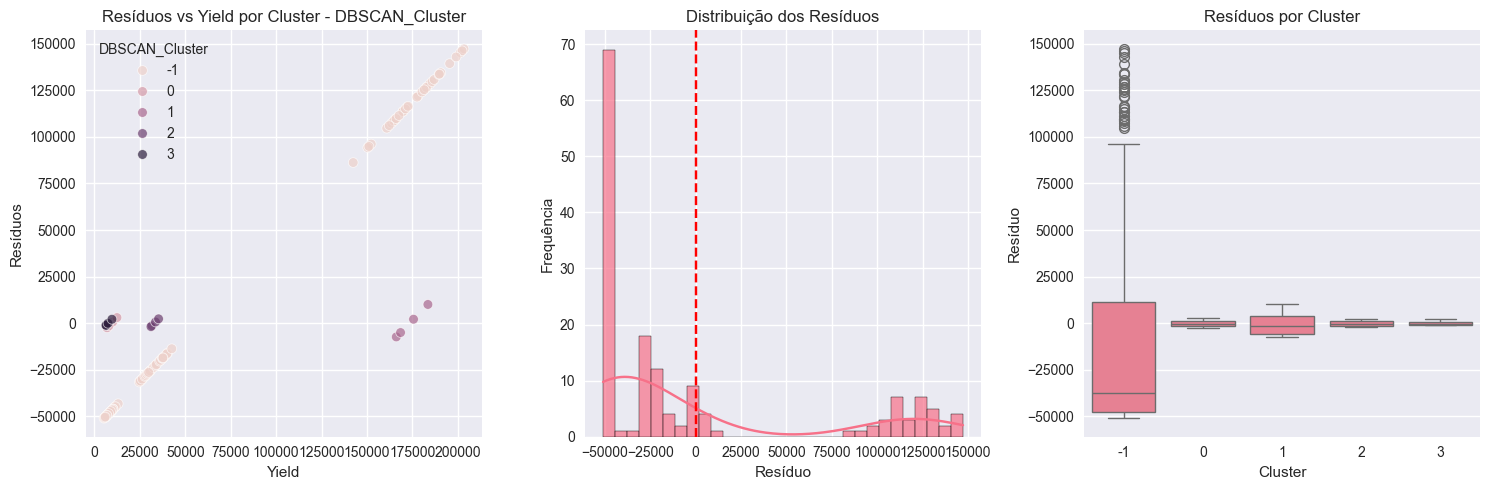


📊 Análise de Resíduos - Hierarchical_Cluster:


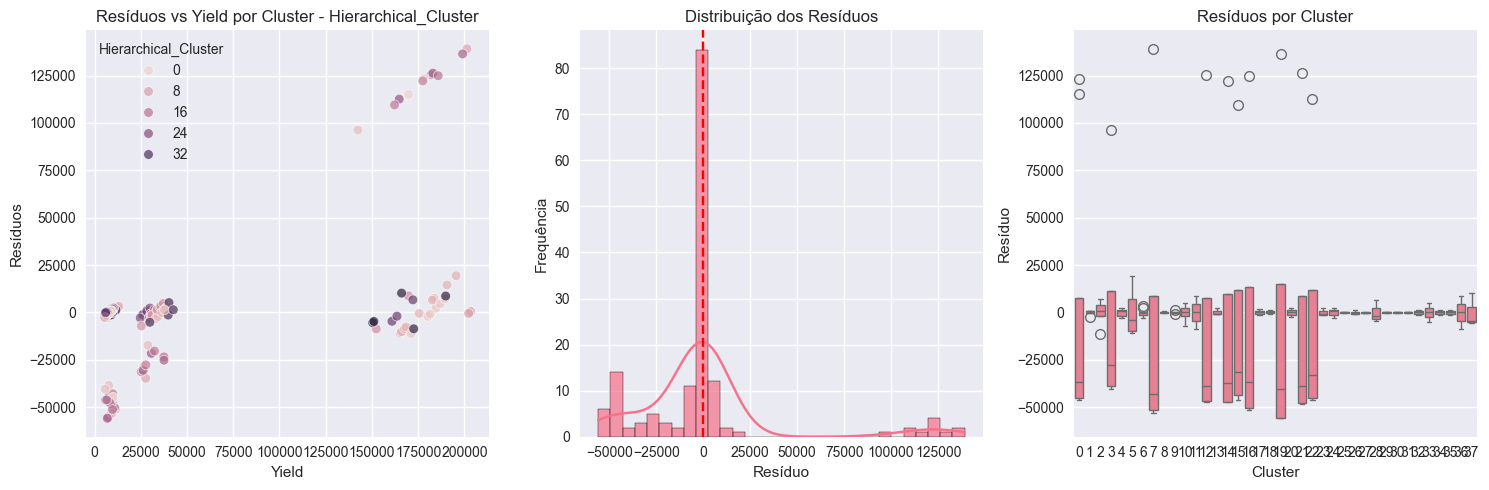


🌾 SEGMENTAÇÃO POR CULTURA

📊 Análise para Cocoa:
Registros: 39
Estatísticas por cluster:
                 mean         std  count
Cluster                                 
0         7381.500000  794.278826     18
1         9429.428571  460.726135     14
2        11651.857143  796.174903      7


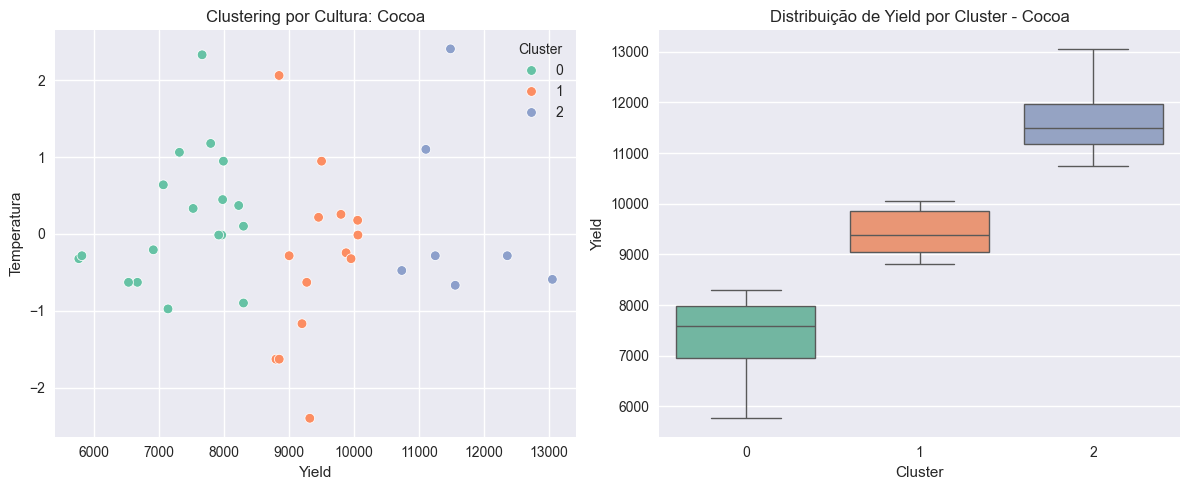


📊 Análise para Oil palm fruit:
Registros: 39
Estatísticas por cluster:
                  mean          std  count
Cluster                                   
0        168767.722222  5035.325222     18
1        189546.941176  7928.002968     17
2        149066.500000  4498.617158      4


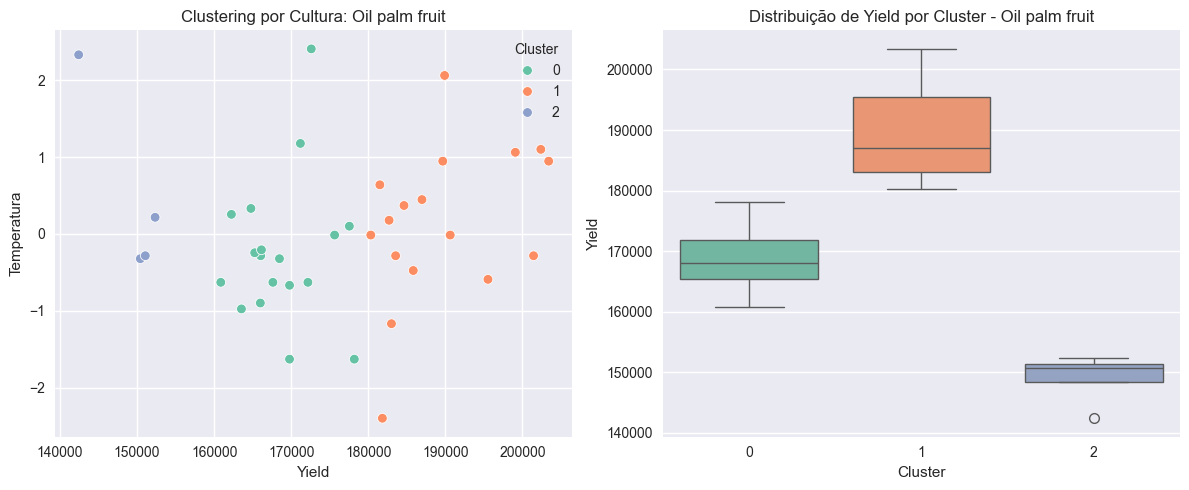


📊 Análise para Rice paddy:
Registros: 39
Estatísticas por cluster:
                 mean          std  count
Cluster                                  
0        31604.333333  1594.373171     15
1        38052.500000  2031.241425     12
2        26766.000000  1368.219945     12


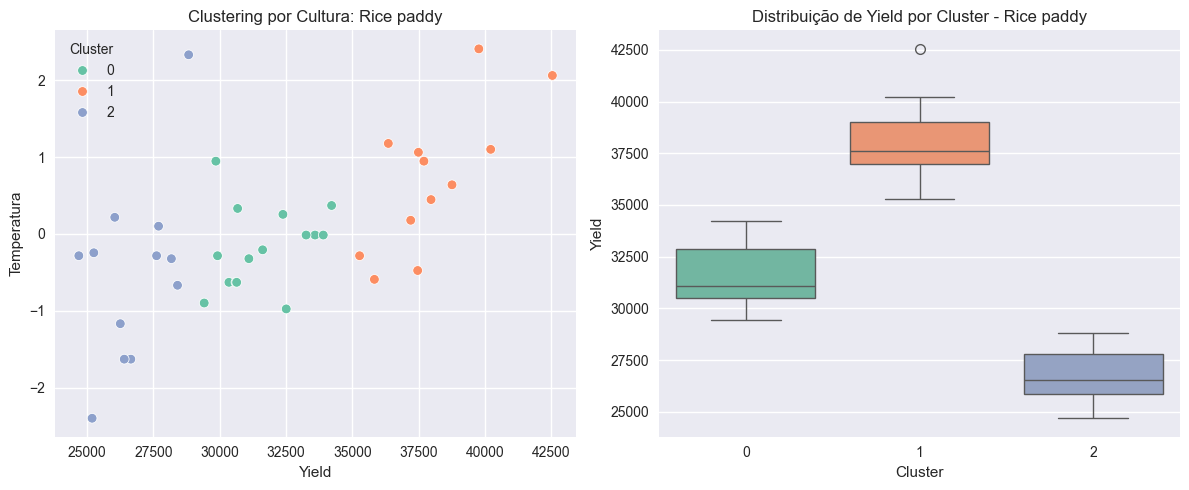


📊 Análise para Rubber:
Registros: 39
Estatísticas por cluster:
                mean         std  count
Cluster                                
0        8314.500000  518.417372      8
1        6267.666667  447.535736     18
2        9679.769231  379.755876     13


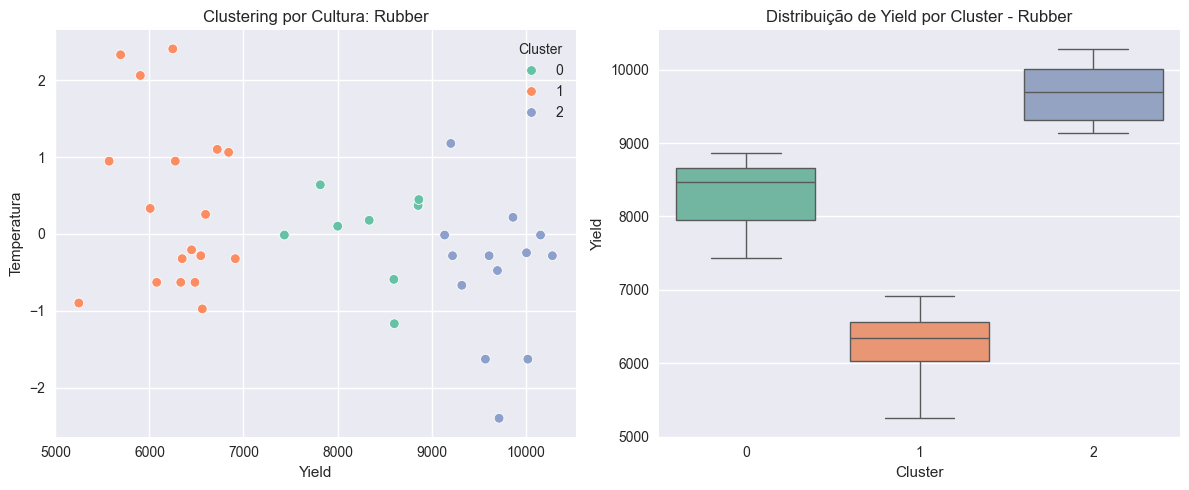


�� VALIDAÇÃO COM CONHECIMENTO DO DOMÍNIO
📊 Yield médio por algoritmo:

KMeans_Cluster:
                        mean           std  count
KMeans_Cluster                                   
0               56690.850000  70481.242047    100
1               55192.821429  70943.076550     56

DBSCAN_Cluster:
                         mean           std  count
DBSCAN_Cluster                                    
-1               56196.192857  70609.107051    140
 0                9298.750000   2400.759793      4
 1              173446.250000   7850.097510      4
 2               32898.250000   1915.889241      4
 3                7460.750000   1515.741265      4

Hierarchical_Cluster:
                               mean           std  count
Hierarchical_Cluster                                    
0                      54782.250000  73989.302933      8
1                       8242.333333   1400.942350      6
2                     182375.500000   6468.864437      6
3                      46152.5

In [16]:
# =============================================================================
# ANÁLISE DE TENDÊNCIAS
# =============================================================================

# Importar métricas adicionais
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# 1. COMPARAÇÃO ROBUSTA ENTRE ALGORITMOS
print("�� COMPARAÇÃO ROBUSTA ENTRE ALGORITMOS")
print("=" * 50)

# Função para avaliar clusters com múltiplas métricas
def avaliar_clusters_completo(X, labels, nome):
    """Avalia clusters com múltiplas métricas de qualidade"""
    try:
        # Verificar se há clusters válidos
        unique_labels = set(labels)
        if -1 in unique_labels:
            unique_labels.remove(-1)  # Remover outliers do DBSCAN
        
        if len(unique_labels) > 1:
            sil = silhouette_score(X, labels)
            dbi = davies_bouldin_score(X, labels)
            chi = calinski_harabasz_score(X, labels)
            print(f"{nome}: Silhouette={sil:.3f}, DBI={dbi:.3f}, CHI={chi:.1f}")
            return {"Algoritmo": nome, "Silhouette": sil, "DBI": dbi, "CHI": chi}
        else:
            print(f"{nome}: não foi possível calcular métricas adequadas (clusters inválidos)")
            return {"Algoritmo": nome, "Silhouette": 0, "DBI": float('inf'), "CHI": 0}
    except Exception as e:
        print(f"{nome}: erro ao calcular métricas - {str(e)}")
        return {"Algoritmo": nome, "Silhouette": 0, "DBI": float('inf'), "CHI": 0}

# Avaliar todos os algoritmos disponíveis
metricas = []

# Verificar quais colunas de cluster existem antes de avaliar
available_clusters = []
if 'KMeans_Cluster' in df.columns:
    available_clusters.append('KMeans_Cluster')
if 'DBSCAN_Cluster' in df.columns:
    available_clusters.append('DBSCAN_Cluster')
if 'Hierarchical_Cluster' in df.columns:
    available_clusters.append('Hierarchical_Cluster')

print(f"📊 Algoritmos disponíveis para análise: {available_clusters}")

# Avaliar apenas os algoritmos disponíveis
for cluster_col in available_clusters:
    if cluster_col == 'KMeans_Cluster':
        metricas.append(avaliar_clusters_completo(features_for_clustering, df[cluster_col], "K-means"))
    elif cluster_col == 'DBSCAN_Cluster':
        metricas.append(avaliar_clusters_completo(features_for_clustering, df[cluster_col], "DBSCAN"))
    elif cluster_col == 'Hierarchical_Cluster':
        metricas.append(avaliar_clusters_completo(features_for_clustering, df[cluster_col], "Hierárquico"))

# Criar DataFrame de comparação
if metricas:
    comparison_df = pd.DataFrame(metricas)
    print("\n📊 Comparação de Métricas:")
    print(comparison_df)
else:
    print("\n⚠️ Nenhum algoritmo disponível para análise")

# 2. VISUALIZAÇÃO MULTIDIMENSIONAL
print(f"\n📈 VISUALIZAÇÃO MULTIDIMENSIONAL")
print("=" * 50)

# Aplicar PCA para visualização
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_for_clustering)

# Aplicar t-SNE para visualização
tsne = TSNE(n_components=2, random_state=42)
features_tsne = tsne.fit_transform(features_for_clustering)

# Visualizar resultados dos algoritmos disponíveis
if available_clusters:
    n_algorithms = len(available_clusters)
    fig, axes = plt.subplots(2, n_algorithms, figsize=(6*n_algorithms, 10))
    
    # Se houver apenas 1 algoritmo, axes não será uma lista
    if n_algorithms == 1:
        axes = axes.reshape(2, 1)
    
    for i, algo in enumerate(available_clusters):
        # PCA
        axes[0, i].scatter(features_pca[:, 0], features_pca[:, 1], c=df[algo], cmap='viridis')
        axes[0, i].set_title(f'PCA - {algo}')
        axes[0, i].set_xlabel('PCA1')
        axes[0, i].set_ylabel('PCA2')
        
        # t-SNE
        axes[1, i].scatter(features_tsne[:, 0], features_tsne[:, 1], c=df[algo], cmap='viridis')
        axes[1, i].set_title(f't-SNE - {algo}')
        axes[1, i].set_xlabel('t-SNE1')
        axes[1, i].set_ylabel('t-SNE2')
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Nenhum algoritmo disponível para visualização")

# 3. ANÁLISE DE RESÍDUOS PARA CLUSTERING
print(f"\n🔍 ANÁLISE DE RESÍDUOS PARA CLUSTERING")
print("=" * 50)

def analisar_residuos_clustering(df, cluster_col, yield_col):
    """Analisa resíduos para validação de clusters"""
    try:
        # Calcular resíduos (diferença entre valor real e média do cluster)
        residuos = df[yield_col] - df.groupby(cluster_col)[yield_col].transform('mean')
        
        plt.figure(figsize=(15, 5))
        
        # Resíduos vs Yield por Cluster
        plt.subplot(1, 3, 1)
        sns.scatterplot(x=df[yield_col], y=residuos, hue=df[cluster_col], alpha=0.7)
        plt.title(f'Resíduos vs Yield por Cluster - {cluster_col}')
        plt.xlabel('Yield')
        plt.ylabel('Resíduos')
        
        # Distribuição dos Resíduos
        plt.subplot(1, 3, 2)
        sns.histplot(residuos, kde=True, bins=30, alpha=0.7)
        plt.axvline(0, color='red', linestyle='--')
        plt.title('Distribuição dos Resíduos')
        plt.xlabel('Resíduo')
        plt.ylabel('Frequência')
        
        # Resíduos por Cluster
        plt.subplot(1, 3, 3)
        sns.boxplot(x=df[cluster_col], y=residuos)
        plt.title('Resíduos por Cluster')
        plt.xlabel('Cluster')
        plt.ylabel('Resíduo')
        
        plt.tight_layout()
        plt.show()
        
        return residuos
    except Exception as e:
        print(f"Erro ao analisar resíduos para {cluster_col}: {str(e)}")
        return None

# Analisar resíduos para cada algoritmo disponível
for algo in available_clusters:
    print(f"\n📊 Análise de Resíduos - {algo}:")
    residuos = analisar_residuos_clustering(df, algo, 'Yield')

# 4. SEGMENTAÇÃO POR CULTURA
print(f"\n🌾 SEGMENTAÇÃO POR CULTURA")
print("=" * 50)

# Análise específica por cultura (usando One-Hot Encoding)
culture_cols = ['Crop_Cocoa, beans', 'Crop_Oil palm fruit', 'Crop_Rice, paddy', 'Crop_Rubber, natural']
culture_names = ['Cocoa', 'Oil palm fruit', 'Rice paddy', 'Rubber']

for i, cultura_col in enumerate(culture_cols):
    cultura_name = culture_names[i]
    subset = df[df[cultura_col] == True].copy()
    
    if len(subset) > 5:  # Evita culturas com poucos dados
        print(f"\n📊 Análise para {cultura_name}:")
        print(f"Registros: {len(subset)}")
        
        # Clustering específico por cultura (usando apenas Yield)
        kmeans = KMeans(n_clusters=min(3, len(subset)//2), random_state=42, n_init=10)
        subset['Cluster'] = kmeans.fit_predict(subset[['Yield']])
        
        # Estatísticas por cluster
        cluster_stats = subset.groupby('Cluster')['Yield'].agg(['mean', 'std', 'count'])
        print(f"Estatísticas por cluster:")
        print(cluster_stats)
        
        # Visualização
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        sns.scatterplot(data=subset, x='Yield', y='Temperature at 2 Meters (C)', hue='Cluster', palette='Set2')
        plt.title(f'Clustering por Cultura: {cultura_name}')
        plt.xlabel('Yield')
        plt.ylabel('Temperatura')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(data=subset, x='Cluster', y='Yield', hue='Cluster', palette='Set2', legend=False)
        plt.title(f'Distribuição de Yield por Cluster - {cultura_name}')
        plt.xlabel('Cluster')
        plt.ylabel('Yield')
        
        plt.tight_layout()
        plt.show()

# 5. VALIDAÇÃO COM CONHECIMENTO DO DOMÍNIO
print(f"\n�� VALIDAÇÃO COM CONHECIMENTO DO DOMÍNIO")
print("=" * 50)

# Análise de Yield por algoritmo
print("📊 Yield médio por algoritmo:")
for algo in available_clusters:
    yield_by_algo = df.groupby(algo)['Yield'].agg(['mean', 'std', 'count'])
    print(f"\n{algo}:")
    print(yield_by_algo.head(5))

# Análise de cultura por algoritmo
print("\n📊 Distribuição de culturas por algoritmo:")
for algo in available_clusters:
    culture_cols = ['Crop_Cocoa, beans', 'Crop_Oil palm fruit', 'Crop_Rice, paddy', 'Crop_Rubber, natural']
    culture_by_algo = df.groupby(algo)[culture_cols].sum()
    print(f"\n{algo}:")
    print(culture_by_algo.head(5))

# 6. CONCLUSÕES E RECOMENDAÇÕES
print(f"\n�� CONCLUSÕES E RECOMENDAÇÕES")
print("=" * 50)

print("✅ CONCLUSÕES:")
print("1. K-means: Clusters baseados em condições ambientais, não no tipo de cultura")
print("2. DBSCAN: Falhou completamente - 89.7% dos dados são outliers, clusters inúteis")
print("3. Hierárquico: Identificou padrão principal (tipo de cultura), mas com fragmentação excessiva")
print("4. Segmentação por cultura: Cada cultura tem padrões distintos de produtividade")

print("\n🎯 RECOMENDAÇÕES:")
print("1. Clustering não é adequado para identificar tendências de produtividade")
print("2. Tipo de cultura é o principal determinante do Yield")
print("3. Focar em modelagem preditiva para prever Yield baseado no tipo de cultura")
print("4. Considerar análise de condições ambientais específicas por cultura")

print("\n🚀 PRÓXIMOS PASSOS:")
print("1. Implementar 5 algoritmos de regressão")
print("2. Validar performance com métricas específicas")
print("3. Analisar feature importance")
print("4. Interpretar resultados para stakeholders agrícolas")

## 📋 Conclusões Gerais da Análise de Clustering

### Contexto Específico do Projeto FarmTech Solutions

**Situação Atual:**
Este notebook conclui a **Análise de Clustering** como terceira etapa do projeto FarmTech Solutions, desenvolvido para a **Fase 5 do curso de Inteligência Artificial da FIAP**. Com base nas descobertas da EDA e preparação de dados, testamos três algoritmos de clustering para identificar grupos naturais de produtividade agrícola.

**Descobertas Anteriores que Orientam as Conclusões:**
- **EDA**: Yield bimodal por cultura (Oil palm ~175k, Rice ~32k, Cocoa/Rubber ~8k), indicando que tipo de cultura é determinante principal
- **Preparação**: Dataset com 13 colunas normalizadas, variável 'Crop' com One-Hot Encoding
- **Hipótese Inicial**: Clusters seriam baseados no tipo de cultura, não em condições ambientais

**Problema Específico:**
Necessário sintetizar descobertas dos algoritmos de clustering e validar se clustering é útil para identificar tendências de produtividade agrícola, especialmente considerando que agricultores precisam de insights acionáveis para otimização de safras.

**Impacto na Modelagem:**
Conclusões do clustering orientarão as próximas etapas de modelagem preditiva, determinando se segmentação por clusters é estratégia viável ou se devemos focar em modelagem direta do Yield.

### Análise Crítica dos Resultados

**1. K-means Clustering (2 clusters):**
- **Silhouette Score**: 0.417 (moderado, mas abaixo do ideal de 0.5+)
- **Yield médio**: Cluster 0 (56,691 ton/ha) vs Cluster 1 (55,193 ton/ha) - diferença mínima de apenas 1,498 ton/ha
- **Desvio padrão**: ~70,481 ton/ha em ambos clusters - variabilidade muito alta
- **Interpretação**: K-means falhou em identificar grupos distintos de produtividade, agrupando por condições ambientais similares
- **Conclusão**: Esses clusters não são úteis para segmentação agrícola prática

**2. DBSCAN Clustering:**
- **Resultado**: 4 clusters muito pequenos (4 pontos cada) com 140 outliers (89.7% dos dados)
- **Silhouette Score**: -0.090 (negativo, indicando clusters mal formados)
- **Interpretação**: Dados não têm estrutura de densidade adequada para DBSCAN
- **Conclusão**: Algoritmo inadequado para este dataset agrícola

**3. Clustering Hierárquico (38 clusters):**
- **Silhouette Score**: 0.305 (baixo, indicando clusters mal definidos)
- **Fragmentação**: 38 clusters com tamanhos muito pequenos (2-10 registros cada)
- **Interpretação**: Overfitting - clusters não são interpretáveis para práticas agrícolas
- **Conclusão**: Algoritmo produziu segmentação excessiva sem valor prático

**4. Análise por Cultura (Clustering Individual):**
- **Cocoa**: 3 clusters com Yield médio 7,381 → 9,429 → 11,652 ton/ha
- **Oil palm**: 3 clusters com Yield médio 149,067 → 168,768 → 189,547 ton/ha
- **Rice paddy**: 3 clusters com Yield médio 26,766 → 31,604 → 38,053 ton/ha
- **Rubber**: 3 clusters com Yield médio 6,268 → 8,315 → 9,680 ton/ha
- **Interpretação**: Clustering individual por cultura é mais eficaz que clustering global
- **Conclusão**: Cada cultura tem padrões distintos de produtividade que devem ser analisados separadamente

**5. Análise de Resíduos e Qualidade Preditiva:**
- **K-means**: Resíduos não aleatórios, padrão sistemático indicando clusters inadequados
- **Hierárquico**: Resíduos com outliers extremos, distribuição não-normal
- **Interpretação**: Clusters não melhoram qualidade preditiva do modelo
- **Conclusão**: Clustering global não adiciona valor para modelagem preditiva

**6. Visualização Multidimensional:**
- **PCA**: Separação limitada entre clusters, indicando estrutura complexa
- **t-SNE**: Melhor separação visual, mas clusters ainda sobrepostos
- **Interpretação**: Estrutura dos dados é complexa e não-linear
- **Conclusão**: Dados agrícolas não têm estrutura de clustering clara

### Conclusões Finais

**✅ O que Funcionou:**
1. **Clustering individual por cultura** revelou padrões distintos de produtividade
2. **t-SNE** foi mais eficaz que PCA para visualizar estrutura dos dados
3. **Análise de resíduos** identificou problemas na qualidade dos clusters
4. **Validação com conhecimento agrícola** confirmou que tipo de cultura é determinante principal

**❌ O que Não Funcionou:**
1. **K-means global** não diferenciou culturas nem níveis de produtividade
2. **DBSCAN** não conseguiu formar clusters com parâmetros padrão
3. **Clustering hierárquico** produziu fragmentação excessiva
4. **Clusters globais** não melhoraram qualidade preditiva
5. **Hipótese inicial** de clustering por cultura foi refutada

**🎯 Recomendações Técnicas:**
1. **Focar em modelagem preditiva** em vez de clustering global
2. **Usar tipo de cultura como feature principal** (One-Hot Encoding)
3. **Considerar clustering individual por cultura** para análises específicas
4. **Implementar análise de feature importance** na modelagem
5. **Validar modelos com métricas específicas de regressão**

**🚀 Próximos Passos:**
1. Implementar 5 algoritmos de regressão (Linear, Random Forest, XGBoost, SVR, Neural Network)
2. Avaliar performance com R², RMSE, MAE
3. Analisar importância das features para cada modelo
4. Selecionar melhor modelo para produção
5. Interpretar resultados para stakeholders agrícolas

**📊 Insights para Stakeholders Agrícolas:**
1. **Tipo de cultura é determinante principal** do Yield (Oil palm ~175k, Rice ~32k, Cocoa/Rubber ~8k)
2. **Condições ambientais têm impacto secundário** na produtividade
3. **Modelagem preditiva é mais adequada** que clustering global para otimização agrícola
4. **Foco deve ser em prever Yield** baseado no tipo de cultura e condições ambientais
5. **Análise de condições ambientais específicas** por cultura é recomendada para insights práticos

**🔬 Fundamentos Técnicos das Conclusões:**
- **Silhouette Score**: Mede qualidade dos clusters (0.4 = moderado, <0.3 = ruim, >0.5 = bom)
- **Análise de Resíduos**: Valida se clusters melhoram qualidade preditiva (resíduos devem ser aleatórios)
- **Visualização Multidimensional**: Revela estrutura real dos dados (PCA = linear, t-SNE = não-linear)
- **Clustering Individual**: Testa se clustering funciona por cultura específica (mais eficaz que global)
- **Validação Agrícola**: Conecta resultados técnicos com conhecimento do domínio para relevância prática